In [5]:
"""
Install dependencies
"""

%pip install torch pandas matplotlib scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
"""
Importing Libraries       
"""

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import PolynomialFeatures

In [2]:
!curl -o /training_data.csv "https://cdn.weikuwu.me/src/training_data/CSAI_DL/midhw.csv" 
# 此行使用 curl 指令來下載數據檔案，並將其存儲為 training_data.csv 檔案
#previously using wget

data = pd.read_csv('/training_data.csv') # 載入CSV檔案
X = data['X'].values.reshape(-1, 1) # 提取X欄並轉換形狀 [~, 1]
Y = data['Y'].values # 提取Y欄

poly = PolynomialFeatures(degree=3)  # 設定多項式特徵變換
X_poly = poly.fit_transform(X) # 將 X 轉換為多項式特徵

X_tensor = torch.tensor(X_poly, dtype=torch.float32) # 將 X_poly 轉換為張量
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1) # 將 Y 轉換為張量並增加維度 [~, 1]



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1849    0  1849    0     0  24691      0 --:--:-- --:--:-- --:--:-- 26414


In [3]:
# 定義多項式回歸模型類別
class PolynomialRegressionModel(nn.Module):
    # 初始化模型，input_dim 是輸入的特徵維度
    def __init__(self, input_dim):
        super(PolynomialRegressionModel, self).__init__() # 繼承 nn.Module 的初始化方法
        self.linear = nn.Linear(input_dim, 1)  # 定義線性層，將輸入特徵映射到一個輸出

    # 定義前向傳播方法
    def forward(self, x):
        return self.linear(x)  # 返回線性層的輸出

# 創建模型實例，輸入維度為 X_tensor 的特徵數
model = PolynomialRegressionModel(X_tensor.shape[1]) # X_tensor.shape[1] 獲取特徵數量
criterion = nn.MSELoss() # 定義損失函數為均方誤差 (Mean Squared Error)
optimizer = optim.Adam(model.parameters(), lr=0.01) # 定義優化器，使用 Adam 算法，並設定學習率為 0.01


# class NeuralNetModel(nn.Module):
#     def __init__(self):
#         super(NeuralNetModel, self).__init__()
#         self.layer1 = nn.Linear(1, 10) 
#         self.layer2 = nn.Linear(10, 10)  
#         self.layer3 = nn.Linear(10, 1) 
        
#         self.relu = nn.ReLU()  

#     def forward(self, x):
#         x = self.relu(self.layer1(x))
#         x = self.relu(self.layer2(x))
#         x = self.layer3(x)
#         return x

In [6]:
epochs = 500 # 設定訓練的總輪次（epoch）
# consider overfitting?

for epoch in range(epochs):
    model.train()  # 設定模型為訓練模式，這樣會啟用 Dropout 和 Batch Normalization 等訓練時的操作

    y_pred = model(X_tensor)  # 使用模型對輸入的特徵 X_tensor 進行預測，得到預測值 y_pred

    loss = criterion(y_pred, Y_tensor)  # 計算loss，這裡使用loss函數 criterion 比較預測值 y_pred 和實際標籤 Y_tensor 之間的差異

    optimizer.zero_grad()  # 將之前的梯度清零，因為 PyTorch 預設會累積梯度
    loss.backward()  # 反向傳播，計算loss對模型參數的梯度
    optimizer.step()  # 根據計算出的梯度更新模型參數

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.10f}')


Epoch 100/500, Loss: 0.0000000014
Epoch 200/500, Loss: 0.0000000000
Epoch 300/500, Loss: 0.0000000000
Epoch 400/500, Loss: 0.0000000000
Epoch 500/500, Loss: 0.0000000000


In [7]:
model.eval() # 設定模型為評估模式，這會停用 Dropout 和 Batch Normalization 等訓練期間的操作
with torch.no_grad(): # 在這個上下文中禁用梯度計算，因為我們不需要在評估時計算梯度
    predicted = model(X_tensor).squeeze().numpy()  # 使用模型對輸入特徵 X_tensor 進行預測，並轉換為 NumPy 陣列

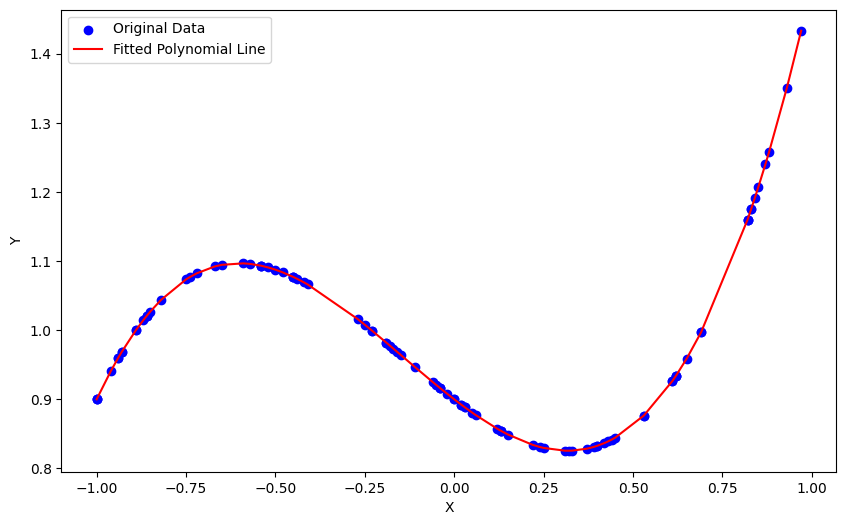

In [8]:
sorted_indices = X.flatten().argsort() # 獲取 X 的index，使其能夠按照值的大小排序
X_sorted = X[sorted_indices] # 根據排序的index對 X 進行排序
predicted_sorted = predicted[sorted_indices] # 根據排序的index對預測結果進行排序

plt.figure(figsize=(10,6)) # 設定圖形的大小
plt.scatter(X, Y, label='Original Data', color='blue')# 繪製原始數據的散點圖
plt.plot(X_sorted, predicted_sorted, label='Fitted Polynomial Line', color='red') # 繪製擬合的多項式回歸線
plt.xlabel('X') # 設定 x 軸標籤
plt.ylabel('Y') # 設定 y 軸標籤
plt.legend()  # 顯示圖例
plt.show()  # 顯示圖形

In [18]:
import numpy as np


try:
    x_input = float(input("Enter a value of X to predict Y: "))
    
    # Transform input using the same polynomial features as used in training
    x_input_poly = poly.transform(np.array([[x_input]]))  # poly is the PolynomialFeatures instance

    # Convert to tensor for PyTorch model
    x_input_tensor = torch.tensor(x_input_poly, dtype=torch.float32)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        y_output = model(x_input_tensor).item()

    # Display the result
    print(f"Predicted Y for X={x_input} is: {y_output:.4f}")
    
except ValueError:
    print("Invalid input. Please enter a numeric value for X.")

Predicted Y for X=2.0 is: 6.9000
